In [1]:
import pickle
import matplotlib.pyplot as plt
import Levenshtein # pip install python-Levenshtein
import pandas
import seaborn

In [2]:
instancesDf = pickle.load(open("binaries/instancesDf.pkl", 'rb'))
truthDf = pickle.load(open("binaries/truthDf.pkl", 'rb'))

In [65]:
truthDf.head()

,truthJudgments,truthMean,id,truthClass,truthMedian,truthMode,output
0,"[0.0, 0.0, 0.0, 0.33333333330000003, 0.0]",0.066667,804113781580328960,no-clickbait,0.000000,0.0,0
1,"[1.0, 0.0, 0.6666666666000001, 1.0, 1.0]",0.733333,804119512010424320,clickbait,1.000000,1.0,1
2,"[0.6666666666000001, 0.6666666666000001, 0.0, ...",0.333333,804121272967983104,no-clickbait,0.333333,0.0,0
3,"[0.0, 0.0, 0.0, 0.33333333330000003, 0.0]",0.066667,804123103995580416,no-clickbait,0.000000,0.0,0
4,"[0.0, 0.6666666666000001, 0.0, 0.0, 0.0]",0.133333,804126501117435904,no-clickbait,0.000000,0.0,0


In [17]:
instancesDf.head()

,postMedia,postText,id,targetCaptions,targetParagraphs,targetTitle,postTimestamp,targetKeywords,targetDescription,ptWordTokens,tdWordTokens,ttWordTokens,tcWordTokens,tpWordTokens,wEmbedding,ptEmbedding,tdEmbedding,imgMatrice,imgEmbeddings,imgFeatures
0,[],"[Panama Papers: Europol links 3,500 names to s...",804113781580328960,[Europol],[Law enforcement agency analysis uncovers prob...,"Panama Papers: Europol links 3,500 names to su...",Thu Dec 01 00:03:59 +0000 2016,"European Union,Panama Papers,Organised crime,W...",Law enforcement agency analysis uncovers proba...,"[Panama, Papers, Europol, links, 3500, names, ...","[Law, enforcement, agency, analysis, uncovers,...","[Panama, Papers, Europol, links, 3500, names, ...",[Europol],"[Law, enforcement, agency, analysis, uncovers,...","[[-0.021118164, -0.06542969, -0.18164062, 0.03...","[0.17153263, 0.047721658, -0.032291368, -0.384...","[0.17153263, 0.047721658, -0.032291368, -0.384...",None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",toilet_tissue
1,[media/photo_804119509338640385.jpg],[The key to truly great chicken soup],804119512010424320,"[Chicken Noodle Soup Warm and comforting, this...","[Warm and comforting, this soup is a classic t...",A Superior Chicken Soup,Thu Dec 01 00:26:46 +0000 2016,"Cooking and Cookbooks,Soups,Poultry",For the best rendition of this American classi...,"[The, key, to, truly, great, chicken, soup]","[For, the, best, rendition, of, this, American...","[A, Superior, Chicken, Soup]","[Chicken, Noodle, Soup, Warm, and, comforting,...","[Warm, and, comforting, this, soup, is, a, cla...","[[-0.17285156, 0.27929688, 0.106933594, -0.158...","[0.34307212, 0.2663471, -0.21023557, -0.107252...","[0.34307212, 0.2663471, -0.21023557, -0.107252...","[[[[141.061 130.22101 124.32 ], [141.061 ...","[7.3700113e-09, 1.088945e-06, 8.522479e-10, 1....",consomme
2,[],[Afghan policewomen face down their fears to s...,804121272967983104,[The battle to recruit women to the Afghan Pol...,[Afghanistan is one of the most dangerous plac...,100 Women 2016: On the frontline with the wome...,Thu Dec 01 00:33:45 +0000 2016,,The Afghan women risking all to join the police.,"[Afghan, policewomen, face, down, their, fears...","[The, Afghan, women, risking, all, to, join, t...","[100, Women, 2016, On, the, frontline, with, t...","[The, battle, to, recruit, women, to, the, Afg...","[Afghanistan, is, one, of, the, most, dangerou...","[[-0.2421875, -0.016479492, 0.18847656, 0.1962...","[0.0018796567, 0.054279476, 0.31657192, 0.1075...","[0.0018796567, 0.054279476, 0.31657192, 0.1075...",None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",toilet_tissue
3,[],[Conservatives are watching less football this...,804123103995580416,"[BuzzFeed Hires Mondelez Marketing Executive, ...",[Explanations for this year’s sagging National...,Older Viewers and Conservatives Are Watching L...,Thu Dec 01 00:41:02 +0000 2016,"nfl,ratings,american football,political,genera...","Many factors are dragging down NFL ratings, in...","[Conservatives, are, watching, less, football,...","[Many, factors, are, dragging, down, NFL, rati...","[Older, Viewers, and, Conservatives, Are, Watc...","[BuzzFeed, Hires, Mondelez, Marketing, Executi...","[Explanations, for, this, year’s, sagging, Nat...","[[0.029052734, -0.12597656, 0.15429688, 0.375,...","[-0.15385677, -0.22928531, 0.19694602, -0.3893...","[-0.15385677, -0.22928531, 0.19694602, -0.3893...",None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",toilet_tissue
4,[media/photo_804125377400553474.jpg],[Richard Sherman weighs in on Cam Newton’s str...,804126501117435904,[Richard Sherman Says 'Karma' Caught Up to Cam...,[Seattle Seahawks cornerback Richard Sherman m...,Seattle Seahawks Richard Sherman Says 'Karma' ...,Thu Dec 01 00:54:32 +0000 2016,"Football, NFL, NFC West, Seattle Seahawks, Bre...","Seattle Seahawks news, rumors, scores, schedul...","[Richard, Sherman, weighs, in, on, Cam, Newton...","[Seattle, Seahawks, news, rumors, scores, sche...","[Seat

# How many words?

In [9]:
instancesDf["ptWordTokens"].str.len().describe()

count    19538.000000
mean        11.575136
std          3.689310
min          0.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         25.000000
Name: ptWordTokens, dtype: float64

Text(0.5, 0.98, 'boxplot - number of words per postMedia')

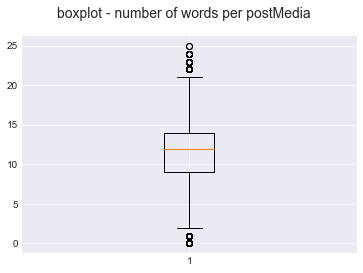

In [95]:
fig, ax = plt.subplots()
ax.boxplot(instancesDf["ptWordTokens"].str.len())
fig.suptitle("boxplot - number of words per postMedia", fontsize = 14)
#plt.savefig('wordLen.png')
#plt.clf()

20 words seems to be just right. It's around the maximum (excluding outliers), and some of them won't even exist in word2vec

# Why Post Vs TargetDescription?
#### We intend to explore if the differences between the bait text ("textPost") and the existing fields in the target article ("targetTitle" and "targetDescription") have any correlation in the article being considered "clickBait". 
#### We consider these 3 fields because they are the fields that can be most directly compared to each other since the content is very similar.

#### About Levenshtein Distance
Levenshtein Distance: In information theory, linguistics and computer science, 
the Levenshtein distance is a string metric for measuring the difference between two sequences. 
Informally, the Levenshtein distance between two words is the minimum number of single-character 
edits (insertions, deletions or substitutions) required to change one word into the other

In [ ]:
instancesDf.iloc[0,:][["postText", "targetDescription"]]

In [37]:
def getLevenchteinDistance(row, isArray=True):
    postText = row[0][0]
    if isArray:
        target = row[1][0]
    else:
        target = row[1]
    return Levenshtein.distance(postText,target)/(len(postText)+len(target))

instancesDf["dist_postText_targetDescription"] = instancesDf[["postText", "targetDescription"]].apply(lambda row : getLevenchteinDistance(row, False), axis=1)
instancesDf["dist_postText_targetTitle"]=instancesDf[["postText", "targetTitle"]].apply(lambda row : getLevenchteinDistance(row, True), axis=1)
instancesDf[["postText","targetDescription","targetTitle","dist_postText_targetDescription", "dist_postText_targetTitle"]].head()

,postText,targetDescription,targetTitle,dist_postText_targetDescription,dist_postText_targetTitle
0,"[Panama Papers: Europol links 3,500 names to s...",Law enforcement agency analysis uncovers proba...,"Panama Papers: Europol links 3,500 names to su...",0.508287,0.968750
1,[The key to truly great chicken soup],For the best rendition of this American classi...,A Superior Chicken Soup,0.518519,0.972222
2,[Afghan policewomen face down their fears to s...,The Afghan women risking all to join the police.,100 Women 2016: On the frontline with the wome...,0.381443,0.980000
3,[Conservatives are watching less football this...,"Many factors are dragging down NFL ratings, in...",Older Viewers and Conservatives Are Watching L...,0.631111,0.981132
4,[Richard Sherman weighs in on Cam Newton’s str...,"Seattle Seahawks news, rumors, scores, schedul...",Seattle Seahawks Richard Sherman Says 'Karma' ...,0.525581,0.971831


In [38]:
instancesDf[["postText","targetDescription","targetTitle","dist_postText_targetDescription", "dist_postText_targetTitle"]].describe()

,dist_postText_targetDescription,dist_postText_targetTitle
count,19538.000000,19538.000000
mean,0.521737,0.972920
std,0.177862,0.021961
min,0.000000,0.666667
25%,0.425177,0.968254
50%,0.489270,0.974359
75%,0.591688,0.980392
max,1.028986,1.866667


In [44]:
newJoined = instancesDf[["targetTitle","dist_postText_targetDescription", "dist_postText_targetTitle"]]
newJoined["truthMean"]=truthDf["truthMean"]
newJoined.corr()

C:\Users\864498\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dist_postText_targetDescription,dist_postText_targetTitle,truthMean
dist_postText_targetDescription,1.000000,-0.225238,0.311481
dist_postText_targetTitle,-0.225238,1.000000,-0.173903
truthMean,0.311481,-0.173903,1.000000


In [47]:
newJoined

,targetTitle,dist_postText_targetDescription,dist_postText_targetTitle,truthMean
0,"Panama Papers: Europol links 3,500 names to su...",0.508287,0.968750,0.066667
1,A Superior Chicken Soup,0.518519,0.972222,0.733333
2,100 Women 2016: On the frontline with the wome...,0.381443,0.980000,0.333333
3,Older Viewers and Conservatives Are Watching L...,0.631111,0.981132,0.066667
4,Seattle Seahawks Richard Sherman Says 'Karma' ...,0.525581,0.971831,0.133333
...,...,...,...,...
19533,Donald Trump said being US president was harde...,0.761290,0.987654,0.000000
19534,Trump Has Flip-Flopped. But His Supporters Are...,0.402516,0.974359,0.266667
19535,Inside Kim Jong-un's camps of death: Former No...,0.714286,0.944444,0.400000
19536,‘Inexcusable’ failures in UK’s response to mod...,0.529595,0.987500,0.133333


#### The difference (in terms of Levenshtein Distance) between the text in the "textPost" (bait field) and the description field in the target article ("descriptionTarget") is more correlated with the clickbait variable ("truthMean") than when we compare the same "textPost" field (bait field)  and the title description of the destination article (" TitleTarget "). Although this correlation is not very pronounced we consider it deserves to be explored.

# DATA DESCRIPTION

## How many pictures by feature?

In [9]:
print("Length: " + str(len(featuresDf["imgFeatures"].unique())))
featuresDf["imgFeatures"].unique()

Length: 749


array(['toilet_tissue', 'consomme', 'rugby_ball', 'bearskin', 'suit',
       'mortarboard', 'hand-held_computer', 'cleaver', 'envelope',
       'academic_gown', 'plunger', 'llama', 'book_jacket', 'Band_Aid',
       'poncho', 'ice_lolly', 'toyshop', 'butcher_shop', 'palace',
       'torch', 'whiskey_jug', 'caldron', 'candle', 'racket', 'lab_coat',
       'jersey', 'loudspeaker', 'abaya', 'military_uniform', 'comic_book',
       'screen', 'sweatshirt', 'basketball', 'oscilloscope', 'vestment',
       'web_site', 'maillot', 'stage', 'brassiere', 'cliff', 'shield',
       'sarong', 'frying_pan', 'digital_clock', 'lipstick', 'obelisk',
       'plastic_bag', 'golfcart', 'miniskirt', 'wooden_spoon',
       'shoe_shop', 'broom', 'crutch', 'American_lobster', 'minibus',
       'lakeside', 'castle', 'bassinet', 'bobsled', 'ski', 'ballplayer',
       'kimono', 'theater_curtain', 'bubble', 'football_helmet',
       'cardigan', 'handkerchief', 'Afghan_hound', 'trench_coat',
       'fur_coat', 'hair

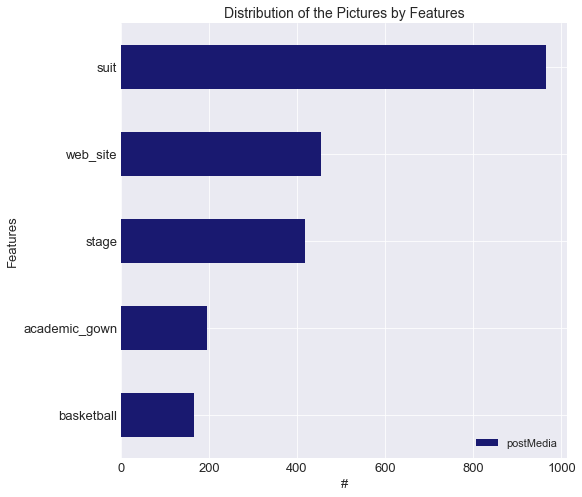

In [4]:
# Number of picture by feature
df = instancesDf[["imgFeatures", "postMedia"]].groupby("imgFeatures").count()
df = pandas.DataFrame(df)
df = df.sort_values(by=["postMedia"], ascending=False)    
df = df.drop(index = ["toilet_tissue"], axis=0)
fig, ax = plt.subplots(figsize=(8,8))
plt.style.use(u'seaborn-darkgrid')
df.iloc[0:5,:].plot(kind='barh', color=['midnightblue'], alpha=1, rot=0, ax=ax)
ax.invert_yaxis()
ax.set_ylabel("Features", fontsize=13)
ax.tick_params(labelsize=13)
ax.set_title("Distribution of the Pictures by Features", fontsize = 14)
ax.set_xlabel("#", fontsize=13)
ax.legend(fontsize=11)
plt.show()

#plt.savefig('distPictures.png')
#plt.clf()

## How many clickbaits and no-clickbaits by feature? (top 10)

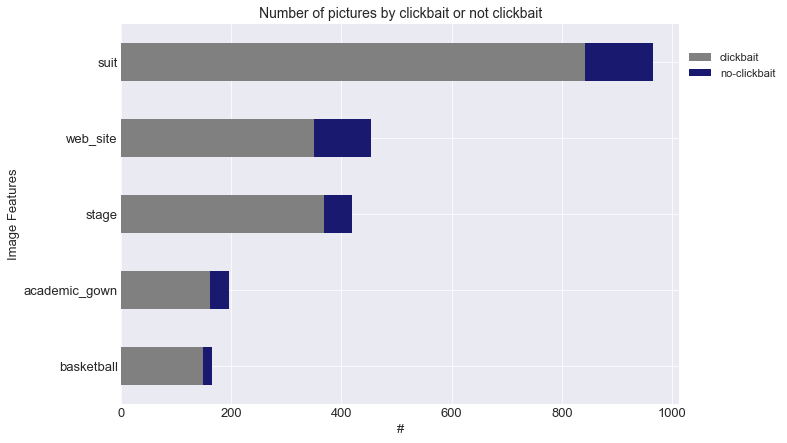

In [6]:
# chart with % of clickbait or no-clickbait by feature
featuresDF = instancesDf
featuresDF["output"] = truthDf["truthClass"]
clickbait = featuresDF[featuresDF['output']=="no-clickbait"].groupby('imgFeatures').count()
noClickbait = featuresDF[featuresDF['output']=="clickbait"].groupby('imgFeatures').count()

df = pandas.DataFrame({'clickbait' : clickbait['output'],
                       'no-clickbait' : noClickbait['output'],
                       'postMedia' : featuresDF[["postMedia", "imgFeatures"]].groupby('imgFeatures').count()["postMedia"]})
df = df.drop(index = ["toilet_tissue"], axis=0)
df = df.sort_values(by=["postMedia"], ascending=False)
fig, ax = plt.subplots(figsize=(10,7))
plt.style.use(u'seaborn-darkgrid')

#df.sort_values(by=['imgFeatures'], ascending=False)
df[["clickbait", "no-clickbait"]].iloc[0:5,:].plot.barh(ax=ax, color= [ "grey" ,"midnightblue"], stacked=True, rot=0)
ax.set_ylabel("Image Features", fontsize=13)
ax.set_xlabel("#", fontsize=13)
ax.tick_params(labelsize=13)
ax.legend(bbox_to_anchor=(1,0.95), fontsize=11)
ax.set_title('Number of pictures by clickbait or not clickbait', fontsize=14)
ax.invert_yaxis()
plt.show()
#plt.savefig('productsGlobal.png')
#plt.clf()

## Clickbait and No-clickbait distribution

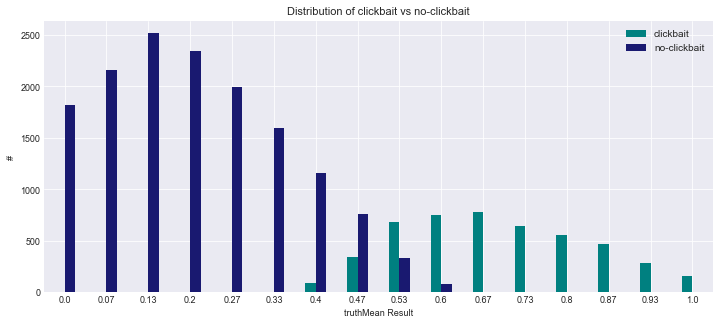

In [98]:
# distribution clickbait vs no-clickbait
newDf = truthDf
newDf["postMedia"] = featuresDf["postMedia"]
newDf["truthMeanRound"] = newDf["truthMean"].round(1)

clickbait = newDf[newDf['truthClass']=='clickbait'].groupby('truthMean').count()
noclickbait = newDf[newDf['truthClass']=="no-clickbait"].groupby('truthMean').count()

df = pandas.DataFrame({'clickbait' : clickbait['postMedia'],
                   'no-clickbait': noclickbait['postMedia']})

fig, ax = plt.subplots(figsize=(12,5))

plt.style.use(u'seaborn-darkgrid')

df.plot(kind='bar', color=['teal', 'midnightblue'],alpha=1, rot=0, ax=ax)

ax.set_ylabel("#", fontsize=9)
ax.set_xlabel("truthMean Result", fontsize=9)
ax.tick_params(labelsize=9)
ax.set_title("Distribution of clickbait vs no-clickbait", fontsize = 11)
plt.show()
#plt.savefig('Distributionclickbait.png')
#plt.clf()

## How many tweets based on median?

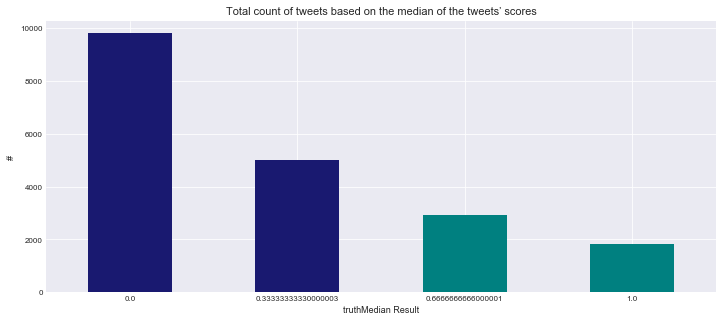

In [99]:
# distribution clickbait vs no-clickbait by Median

newDf = truthDf
newDf["postMedia"] = featuresDf["postMedia"]
newDf["truthMeanRound"] = newDf["truthMean"].round(1)

Median = newDf[newDf['truthClass']=='clickbait'].groupby('truthMedian').count()
Mediannc = newDf[newDf['truthClass']=='no-clickbait'].groupby('truthMedian').count()

df = pandas.DataFrame({'clickbait' : Median['postMedia'],
                   'no-clickbait': Mediannc['postMedia']})

fig, ax = plt.subplots(figsize=(12,5))

plt.style.use(u'seaborn-darkgrid')

df['clickbait'].plot(kind='bar', color=['teal'],alpha=1, rot=0, ax=ax)
df['no-clickbait'].plot(kind='bar', color=['midnightblue'],alpha=1, rot=0, ax=ax)

ax.set_ylabel("#", fontsize=9)
ax.set_xlabel("truthMedian Result", fontsize=9)
ax.tick_params(labelsize=8)
ax.set_title("Total count of tweets based on the median of the tweets’ scores", fontsize = 11)
plt.show()
#plt.savefig('Distribution_clickbait.png')
#plt.clf()

## Boxplot - truthMean

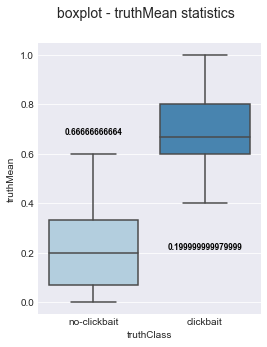

In [8]:

fig, ax1 = plt.subplots(figsize=(4,5))
plt.style.use(u'seaborn-darkgrid')
 
box_plot = seaborn.boxplot( x=truthDf["truthClass"], y=truthDf["truthMean"],  palette="Blues" )

medians = truthDf.groupby(['truthClass'])['truthMean'].median()
vertical_offset = truthDf['truthMean'].median() * 0.05 # offset from median for display
fig.suptitle("boxplot - truthMean statistics", fontsize = 14)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='black',weight='semibold')
    
plt.show()
#plt.savefig('boxplots.png')
#plt.clf()